In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the Dataset

In [5]:
df=pd.read_csv(r'D:\Disk C files\OneDrive\Desktop\internship project\BiStarx\tasks\Month_1\titanic.csv')
df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [6]:
df.shape

(1309, 14)

## Check NULL Values

In [7]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

## Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Handling Missing Values

#### Filled Coulmns with Few Missing Values

In [10]:
df2=[(df['age'].fillna(df['age'].median(), inplace=True)),
(df['fare'].fillna(df['fare'].mean(), inplace=True)),
(df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)),
(df['home.dest'].fillna('Unknown', inplace=True))]

C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\2007040092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2=[(df['age'].fillna(df['age'].median(), inplace=True)),
C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\2007040092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### Drop Columns with Most Missing Values

In [11]:
df2=df.drop(columns=['cabin', 'body', 'boat'], errors='ignore')

In [12]:
df['embarked'].isnull().sum()

np.int64(0)

# Check Dataset Again

In [13]:
df2.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
home.dest    0
dtype: int64

#### Now data is totally cleaned and blanks are filled with suitable Mean/Median/Mode

# Univaraite Analysis

In [14]:
df2.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.905246,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\3511891008.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=df2, palette="Blues")


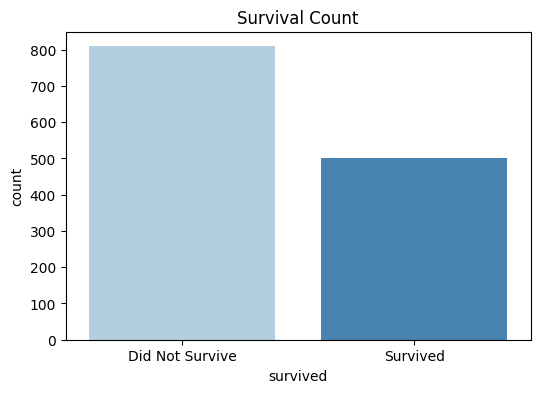

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=df2, palette="Blues")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.title("Survival Count")
plt.show()

### Most of the People did not survive than those who did

#### Age Distribution of Passengers

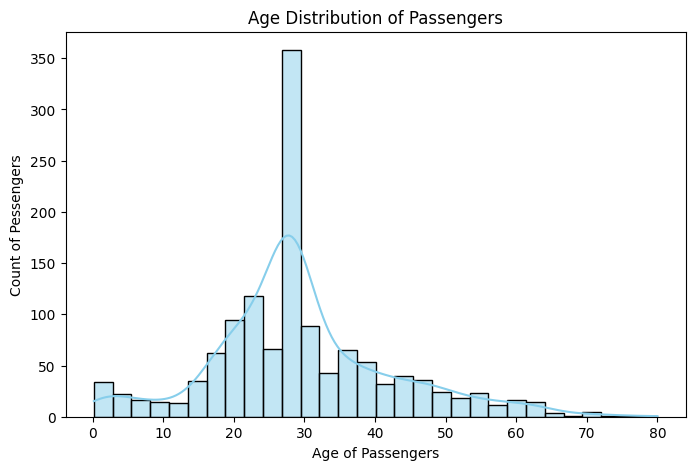

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age of Passengers")
plt.ylabel("Count of Pessengers")
plt.show()


### This chart shows that most passengers are in their **30s** (with a big spike at age 30), a smaller group is in their **20s**, and there are fewer older passengers.

# Fare Distribution

C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\2407674679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['fare'], palette="Blues")


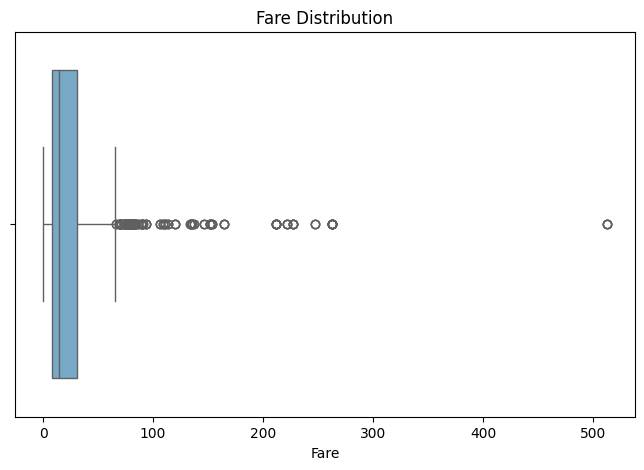

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df2['fare'], palette="Blues")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()


### Many pessengers pay low fares, but few pay high amount as shown by outliers which are far from the main group

# Pessenger Class

C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\3406641588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2['pclass'], palette="viridis")


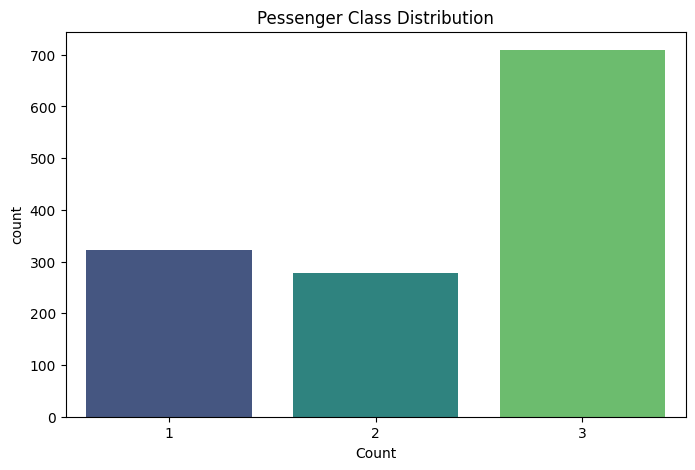

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df2['pclass'], palette="viridis")
plt.title("Pessenger Class Distribution")
plt.xlabel("Pessenger Class")
plt.xlabel("Count")
plt.show()


### Most of the Pessengers were in 3rd class, followed by 1st and 2nd

# Gender Distribution

C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\2083407483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2['sex'], palette="viridis")


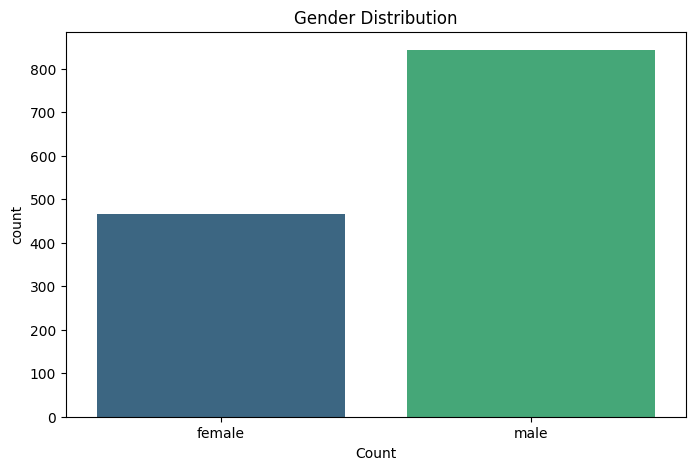

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df2['sex'], palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.xlabel("Count")
plt.show()


## Males were more than Females on board

# Bivariate Analysis

# Age vs Fare Paid

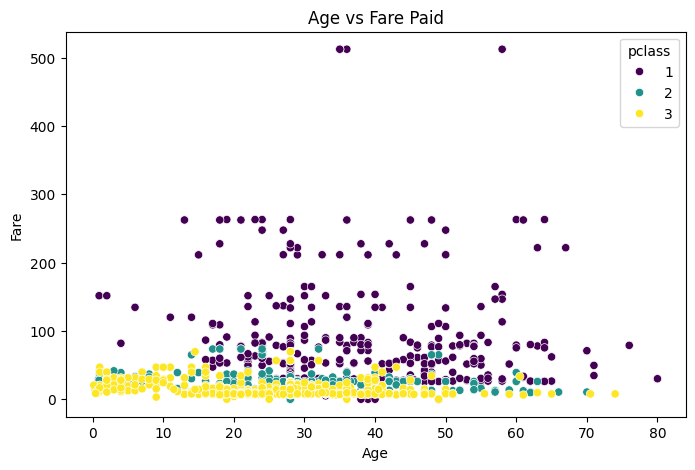

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df2['age'],y=df2['fare'], hue=df2['pclass'], palette="viridis")
plt.title("Age vs Fare Paid")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


### Older and younger passengers paid a wide range of fares, but 1st-class passengers paid the most, while 3rd-class passengers paid the least

# Age Distribution By Survival

C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\2158901390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df2['survived'], y=df2['age'], palette="coolwarm")


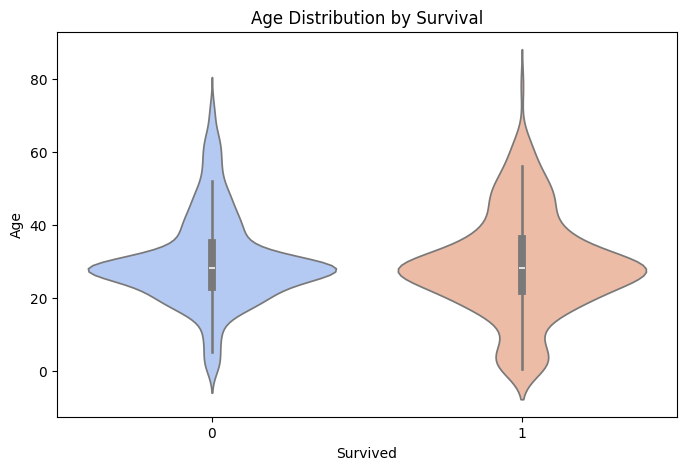

In [37]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df2['survived'], y=df2['age'], palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


### More young people survived than Older Pessengers

# Survival Rate by Passengers Class

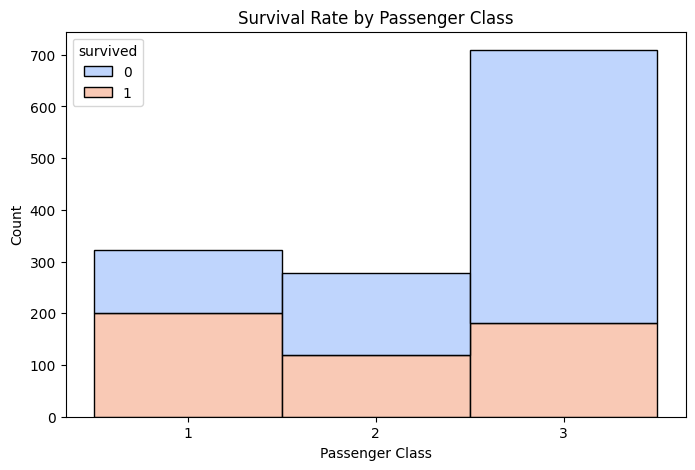

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(x=df2['pclass'], hue=df2['survived'], multiple='stack', palette="coolwarm", discrete=True)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.xticks([1, 2, 3])  
plt.show()

### Survival rate is highest in 1st class and lowest in 3rd clas

# Survival Rate by Gender

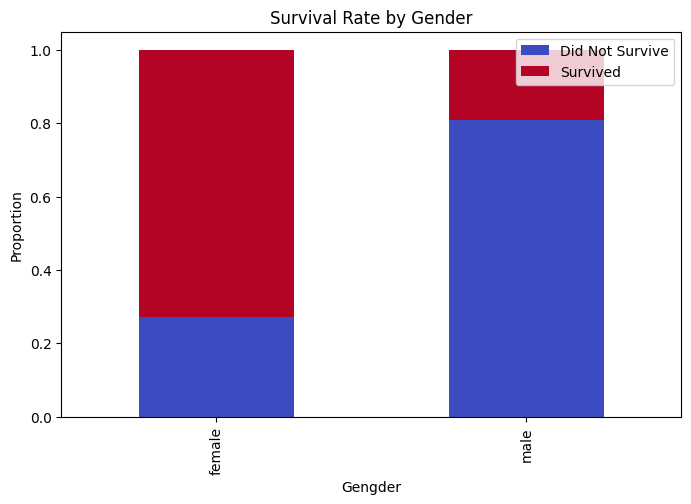

In [36]:
survived_count=df2.groupby('sex')['survived'].value_counts(normalize=True).unstack()
survived_count.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))   
plt.title("Survival Rate by Gender")
plt.xlabel("Gengder")
plt.ylabel("Proportion")
plt.legend(['Did Not Survive', 'Survived'], loc='upper right')  
plt.show()


### Females survival rate is higher than Males

# Fare vs Survival

C:\Users\mariy\AppData\Local\Temp\ipykernel_4792\4016131700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['survived'], y=df2['fare'], palette="coolwarm")


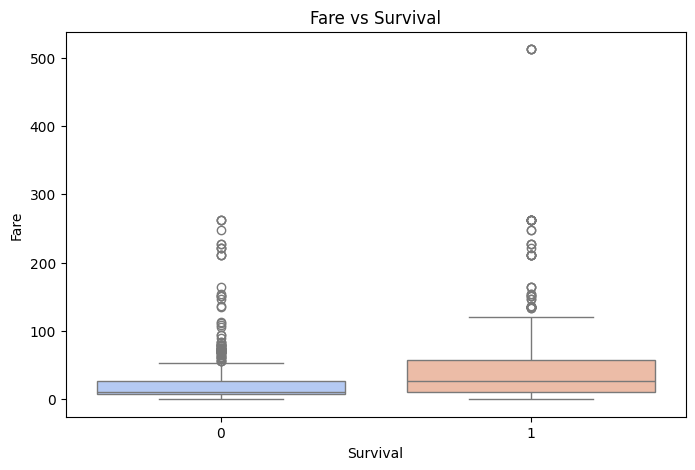

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df2['survived'], y=df2['fare'], palette="coolwarm")
plt.title("Fare vs Survival")
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.show()


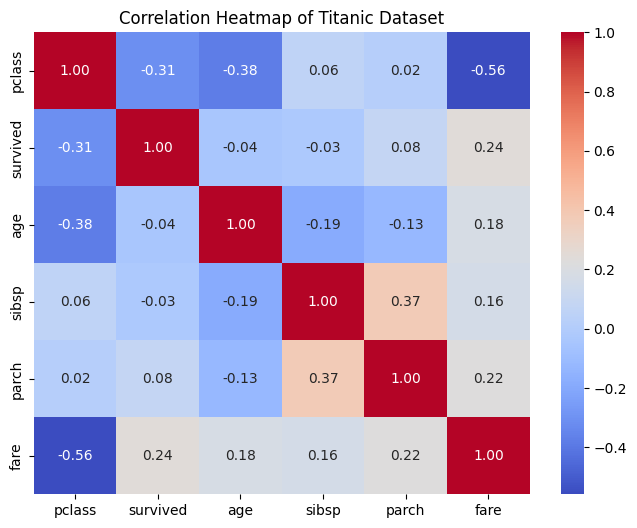

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()


### Fare being positively correlated with survival and passenger class (pclass) being negatively correlated with fare and survival, meaning that passengers from higher classes had better chances of survival.